In [8]:
from mxnet import ndarray as nd
from mxnet import autograd
from mxnet import gluon
import mxnet as mx

num_train = 20
num_test = 100
num_inputs = 200

true_w = nd.ones((num_inputs, 1)) ** 0.01
true_b = 0.05

X = nd.random.normal(shape=(num_train + num_test, num_inputs))
y = nd.dot(X, true_w) + true_b
y += .01 * nd.random.normal(shape=y.shape)

X_train, X_test = X[:num_train, :], X[num_train:, :]
y_train, y_test = y[:num_train], y[num_train:]

In [9]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt
import numpy as np

batch_size = 1
dataset_train = gluon.data.ArrayDataset(X_train, y_train)
data_iter_train = gluon.data.DataLoader(dataset_train, batch_size, shuffle=True)

square_loss = gluon.loss.L2Loss()

def test(net, X, y):
    return square_loss(net(X), y).mean().asscalar()

def train(weight_decay):
    epochs = 10
    learning_rate = 0.005
    net = gluon.nn.Sequential()
    with net.name_scope():
        net.add(gluon.nn.Dense(1))
    net.collect_params().initialize(mx.init.Normal(sigma=1))
    
    trainer = gluon.Trainer(net.collect_params(), "sgd", {'learning_rate': learning_rate, 'wd': weight_decay})
    
    train_loss = []
    test_loss = []
    for e in range(epochs):
        for data, label in data_iter_train:
            with autograd.record():
                output = net(data)
                loss = square_loss(output, label)
            loss.backward()
            trainer.step(batch_size)
        train_loss.append(test(net, X_train, y_train))
        test_loss.append(test(net, X_test, y_test))
    plt.plot(train_loss)
    plt.plot(test_loss)
    plt.legend(['train', 'test'])
    plt.show()
    
    return ('learned w[:10]:', net[0].weight.data()[:, :10], 'learned b:', net[0].bias.data())

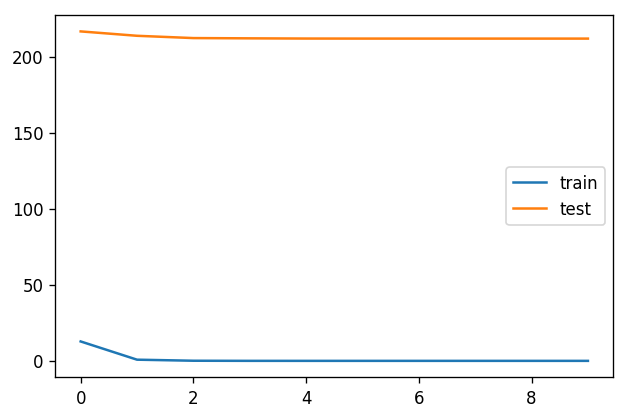

('learned w[:10]:', 
 [[ 0.84242433 -0.69342399 -0.57880187  0.59141713  0.73759413  0.42809564
    1.50199282  0.4750458   0.7902301  -2.13198709]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-0.77260858]
 <NDArray 1 @cpu(0)>)

In [11]:
train(0)

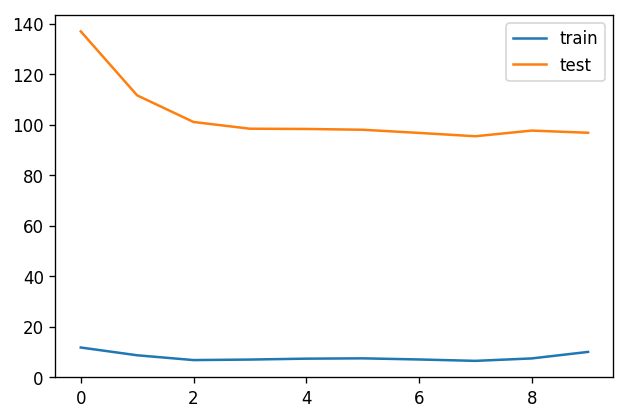

('learned w[:10]:', 
 [[ 0.55138403  0.23820397  0.29817241 -0.08218779  0.24485388  0.11443455
    0.05244068  0.25447115  0.57839072  0.1204917 ]]
 <NDArray 1x10 @cpu(0)>, 'learned b:', 
 [-0.27430773]
 <NDArray 1 @cpu(0)>)

In [12]:
train(5)